In [1]:
pip install "keras"

Note: you may need to restart the kernel to use updated packages.


# Import Packages

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Load Dataset

In [6]:
X_train=np.loadtxt(r"C:\Users\Asus\Downloads\input.csv",delimiter=',')
Y_train=np.loadtxt(r"C:\Users\Asus\Downloads\labels.csv",delimiter=',')

X_test=np.loadtxt(r"C:\Users\Asus\Downloads\input_test.csv",delimiter=',')
Y_test=np.loadtxt(r"C:\Users\Asus\Downloads\labels_test.csv",delimiter=',')

In [7]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [8]:
X_train[1,:]

array([131., 128., 135., ...,  71.,  96.,  74.])

In [9]:
X_train =X_train.reshape(len(X_train),100,100,3)
Y_train =Y_train.reshape(len(Y_train),1)

X_test =X_test.reshape(len(X_test),100,100,3)
Y_test =Y_test.reshape(len(Y_test),1)

X_train =X_train/131.0
X_test =X_test/131.0

In [10]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [11]:
X_train[1,:]

array([[[1.        , 0.97709924, 1.03053435],
        [1.22137405, 1.19847328, 1.2519084 ],
        [1.51145038, 1.46564885, 1.55725191],
        ...,
        [1.90839695, 1.90076336, 1.88549618],
        [1.94656489, 1.94656489, 1.93129771],
        [1.90839695, 1.90076336, 1.87022901]],

       [[1.06870229, 1.04580153, 1.09923664],
        [0.96946565, 0.94656489, 1.        ],
        [0.91603053, 0.87022901, 0.94656489],
        ...,
        [1.91603053, 1.93129771, 1.92366412],
        [1.9389313 , 1.94656489, 1.93129771],
        [1.9389313 , 1.94656489, 1.91603053]],

       [[1.55725191, 1.54198473, 1.58015267],
        [1.42748092, 1.41221374, 1.45038168],
        [1.1221374 , 1.08396947, 1.12977099],
        ...,
        [1.90076336, 1.94656489, 1.94656489],
        [1.81679389, 1.88549618, 1.84732824],
        [1.77099237, 1.83969466, 1.80152672]],

       ...,

       [[1.32824427, 1.38931298, 1.48854962],
        [1.3129771 , 1.3740458 , 1.47328244],
        [1.35877863, 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


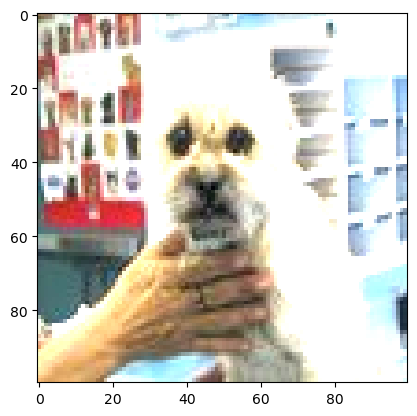

In [12]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [13]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
Conv2D(32,(3,3),activation='relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(64,activation='relu'),
Dense(1,activation='sigmoid')])

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
#opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 15s 368ms/step - loss: 0.7863 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 11s 342ms/step - loss: 0.6871 - accuracy: 0.5805
Epoch 3/5
32/32 [==============================] - 11s 351ms/step - loss: 0.6514 - accuracy: 0.6185
Epoch 4/5
32/32 [==============================] - 11s 354ms/step - loss: 0.5739 - accuracy: 0.7025
Epoch 5/5
32/32 [==============================] - 11s 350ms/step - loss: 0.4754 - accuracy: 0.7860


In [17]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 50ms/step - loss: 0.6188 - accuracy: 0.6625


[0.6187713146209717, 0.6625000238418579]

# Making Predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


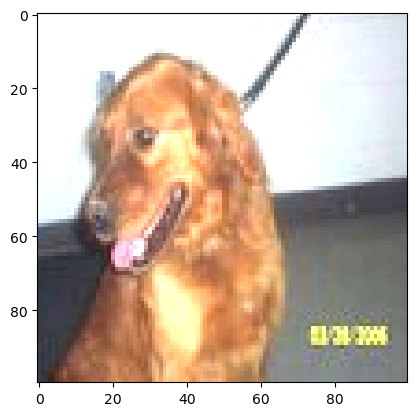

1/1 [==============================] - 0s 53ms/step
Our model says it is a : dog


In [22]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1,100,100, 3))
y_pred=y_pred>0.5
if(y_pred ==0):
    pred="dog"
else:
    pred="cat"
print("Our model says it is a :",pred)